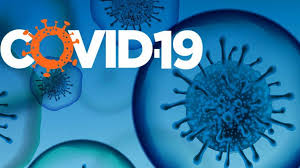

## Import Libraries

In [164]:
import numpy as np 
import pandas as pd
import re
import string
import nltk

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
from PIL import Image

from collections import defaultdict

pyo.init_notebook_mode()
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from nltk.util import ngrams
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import random
plt.rc('figure',figsize=(21,13))

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
            

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admcn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## EDA

In [99]:
df = pd.read_csv("vaccination_tweets.csv")
df.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [100]:
df.sample(5)

id                     user_name  \
7773  1380525774000754690                Simon Bjarning   
4415  1353001339589169155  حسن سجواني 🇦🇪 Hassan Sajwani   
2073  1344986028159938566                      Acidtate   
9939  1429988644543111213          Dr Borisut Hanpanich   
4611  1354238765217312770             Recovery Roadie 🎭   

                    user_location  \
7773                New York, USA   
4415  Dubai, United Arab Emirates   
2073                Worcester, UK   
9939     MD, PhD / Ig: DrBorisut​   
4611                          NaN   

                                       user_description         user_created  \
7773  Professional drummer/percussionist. I’m tweeti...  2018-12-23 03:54:39   
4415  Hassan Sajwani an #Emirati tweets #news #tech ...  2011-12-08 17:40:27   
2073    https://t.co/FdUU6yGFK3 https://t.co/bTdtNULvRT  2014-03-23 15:26:04   
9939  🎎 Medical​ doctor​\n👨‍👩‍👦‍👦 Mom to TNTK\n💎 Doe...  2014-12-26 18:21:06   
4611  🗣Tweeting all things mental health/illness-rel...  2012-08-25 19:30:33   

      user_followers  user_friends  user_favourites  user_verified  \
7773             114           798             1006          False   
4415           93722           599            33257           True   
2073              79           350             6476          False   
9939             485           521             7001          False   
4611             702          2298            12816          False   

                     date                                               text  \
7773  2021-04-09 14:19:28  Second Pfizer shot for me coming up! Go get va...   
4415  2021-01-23 15:27:11  Day 5 - until now: no side effects, no headach...   
2073  2021-01-01 12:37:12  The #ukgovernment can’t even vaccinate properl...   
9939  2021-08-24 02:07:15  "ไฟเซอร์​ได้รับอนมัติผ่านเฟส4​ อย่างเป็นทางการ...   
4611  2021-01-27 01:24:16  Feel incredibly grateful, lucky, glad and prou...   

                                               hashtags               source  \
7773  ['vaccination', 'Pfizer', 'PfizerGang', 'Pfize...   Twitter for iPhone   
4415                                 ['PfizerBioNTech']   Twitter for iPhone   
2073                                   ['ukgovernment']   Twitter for iPhone   
9939                                                NaN  Twitter for Android   
4611                                                NaN   Twitter for iPhone   

      retweets  favorites  is_retweet  
7773         0          2       False  
4415         3        112       False  
2073         0          0       False  
9939         0          0       False  
4611         0          0       False

In [101]:
df.shape

(11020, 16)

In [102]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [104]:
df["datetime"] = pd.to_datetime(df["date"])

df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day


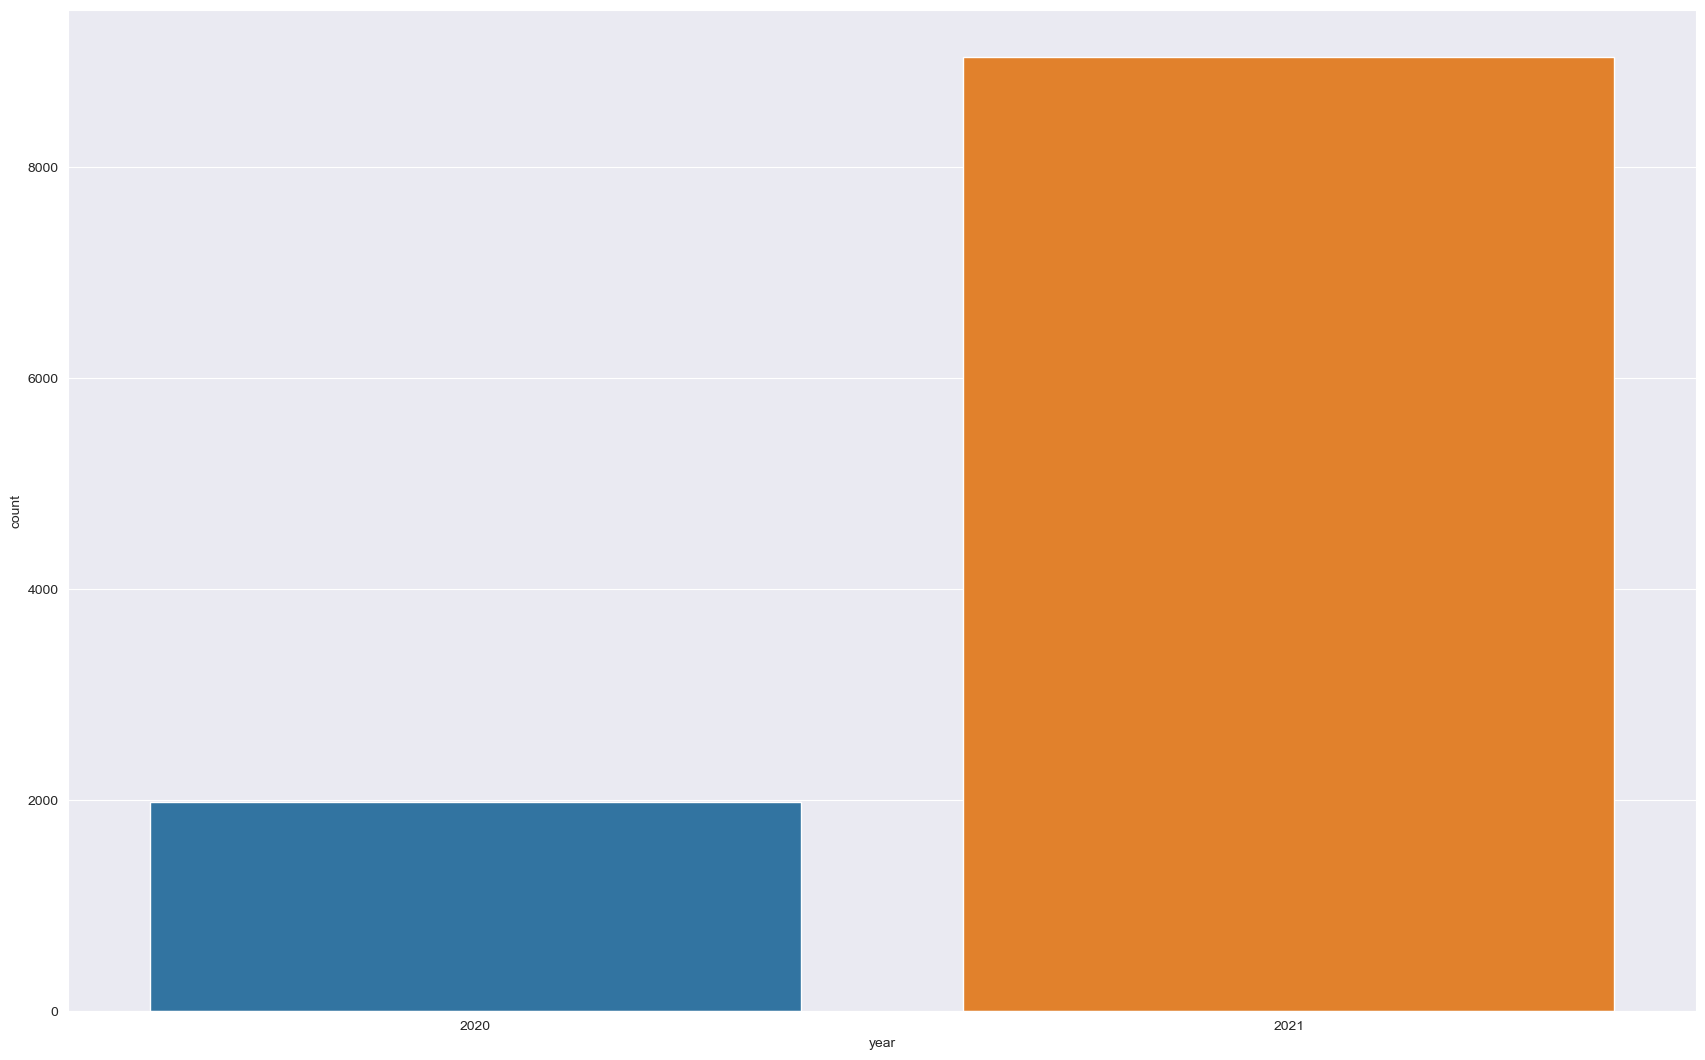

In [105]:
sns.countplot(x=df.year);

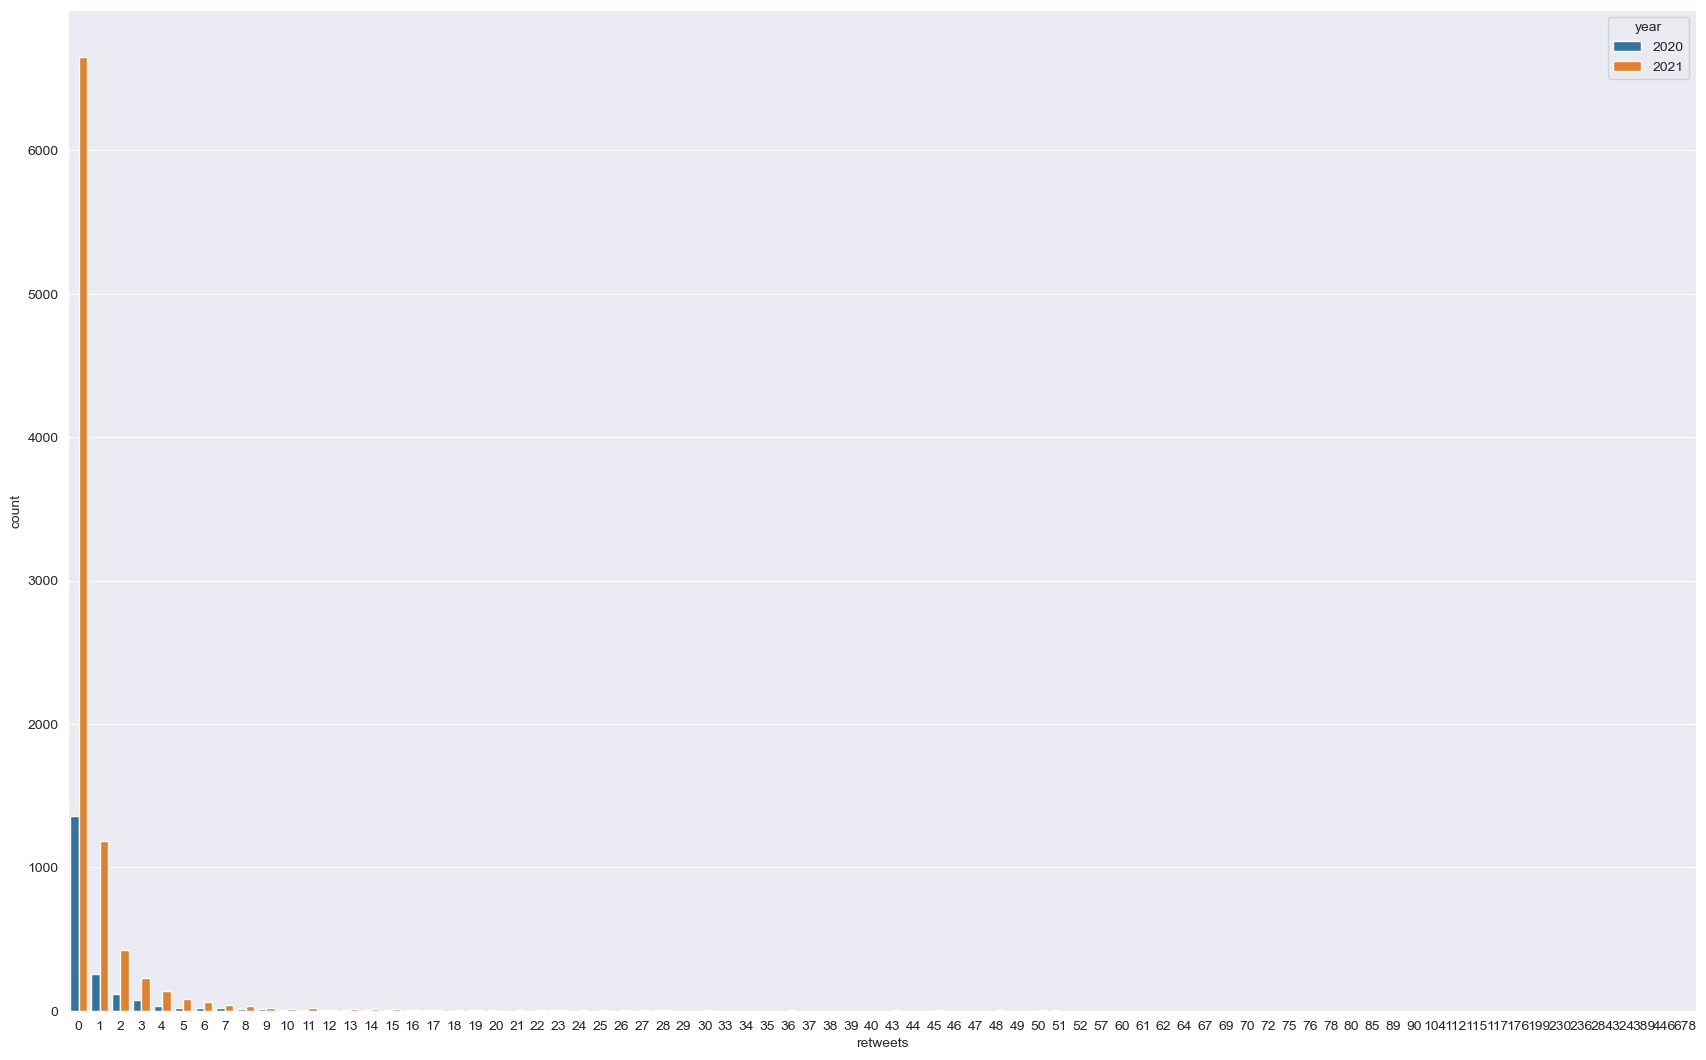

In [106]:
sns.countplot(x=df.retweets, hue=df.year);

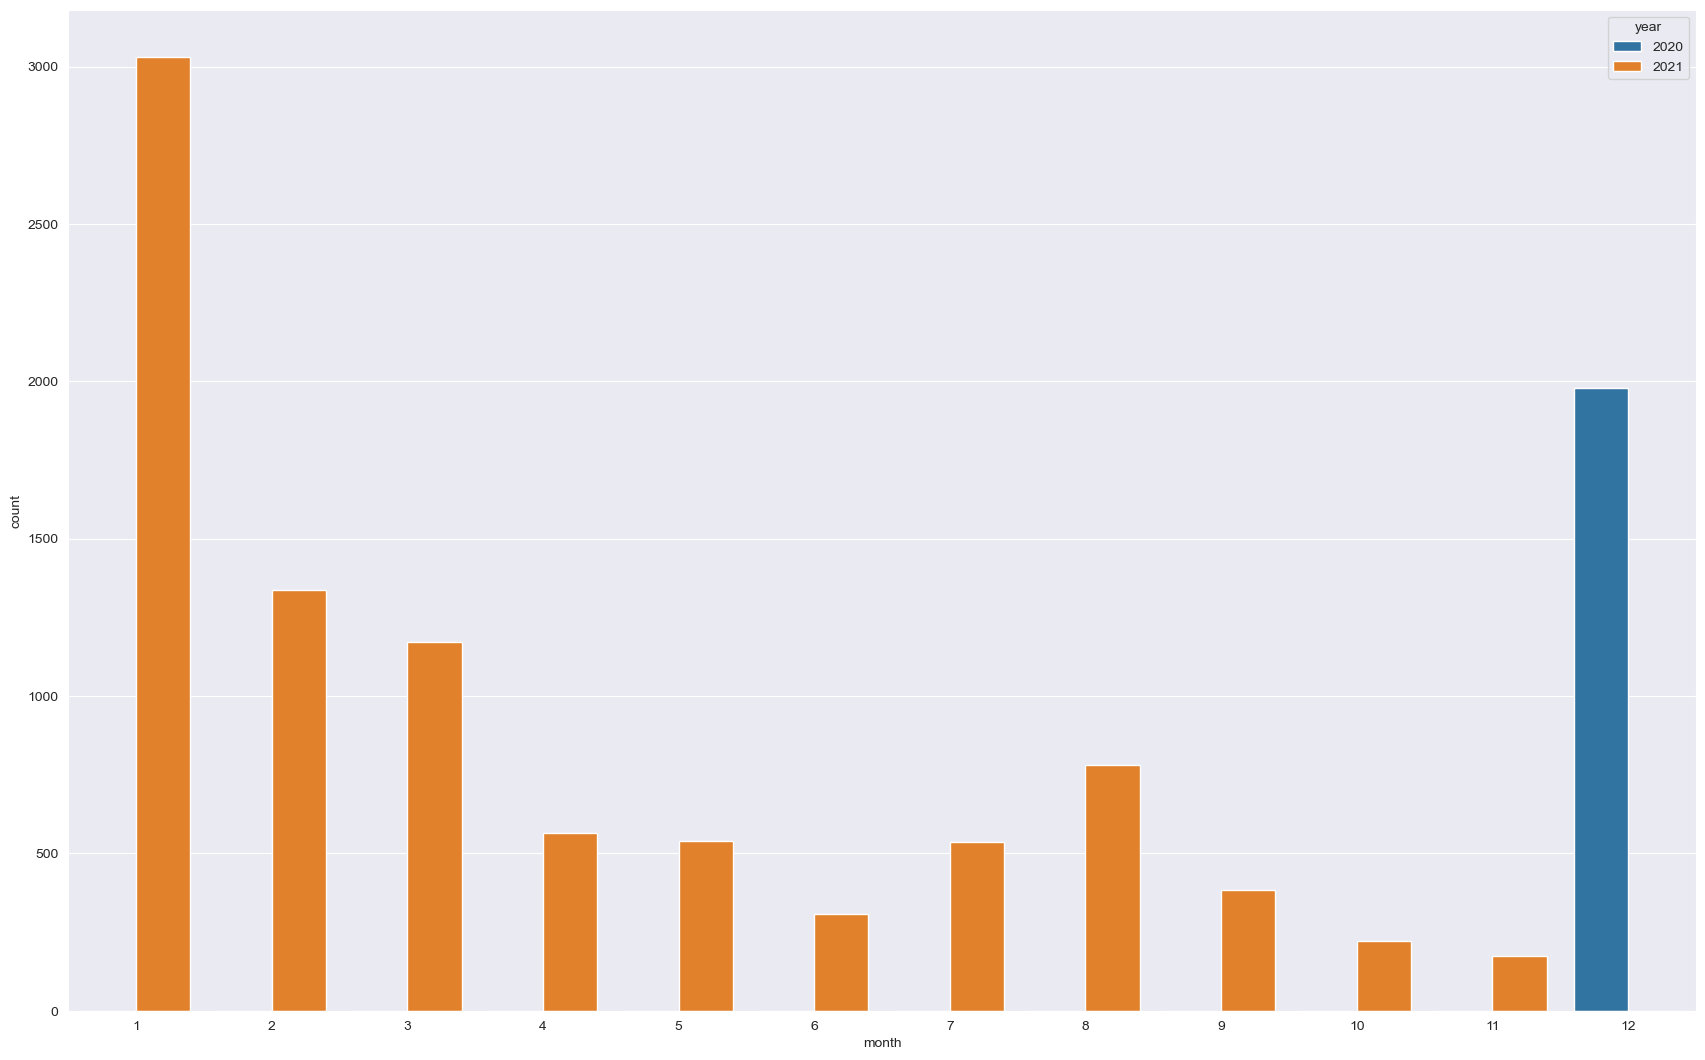

In [107]:
sns.countplot(x=df.month, hue=df.year);

## Text preprocessing

In [108]:
df["text"][0], df["text"][1], df["text"][2], df["text"][3], df["text"][4]

('Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF',
 "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",
 '#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P',
 "Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",
 'Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq')

In [109]:
# converting all text to lower case
df["text"] = df["text"].str.lower()
# Remove URLS
df["text"] = df["text"].apply(lambda x: re.sub(r"http\S+", " ", x))
# removing punctuation   
df["text"] = df["text"].str.replace("[^\w\s]", " ", regex=True)
# removing extra spaces
df["text"] = df["text"].str.replace("\n", " ", regex=True).replace("\r", " ", regex=True).replace("\t", " ", regex=True).str.strip()
# removing digits
df["text"] = df["text"].str.replace("\d+", " ", regex=True)
# removing html entities
df["text"] = df["text"].str.replace("\&\#[0-9]+\;", " ", regex=True)
# Substituting multiple spaces with single space
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [110]:
df["text"][0], df["text"][1], df["text"][2], df["text"][3], df["text"][4]

('same folks said daikon paste could treat a cytokine storm pfizerbiontech',
 'while the world has been on the wrong side of history this year hopefully the biggest vaccination effort we ve ev',
 'coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_ russian vaccine is created to last years',
 'facts are immutable senator even when you re not ethically sturdy enough to acknowledge them you were born i',
 'explain to me again why we need a vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech')

## Covid-19 Vaccine Vader Sentiment Analysis

In [111]:
sid = SIA()

df["sentiment_scores"] = df["text"].apply(lambda x: sid.polarity_scores(x))


In [112]:
df_new = df[["text", "sentiment_scores"]]
df_new.head()

text  \
0  same folks said daikon paste could treat a cyt...   
1  while the world has been on the wrong side of ...   
2  coronavirus sputnikv astrazeneca pfizerbiontec...   
3  facts are immutable senator even when you re n...   
4  explain to me again why we need a vaccine bori...   

                                    sentiment_scores  
0  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...  
1  {'neg': 0.125, 'neu': 0.766, 'pos': 0.109, 'co...  
2  {'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...

In [113]:
df_new["pos"] = df_new["sentiment_scores"].apply(lambda x: x["pos"])
df_new["neg"] = df_new["sentiment_scores"].apply(lambda x: x["neg"])
df_new["neu"] = df_new["sentiment_scores"].apply(lambda x: x["neu"])
df_new["compound"] = df_new["sentiment_scores"].apply(lambda x: x["compound"])
df_new.head()

text  \
0  same folks said daikon paste could treat a cyt...   
1  while the world has been on the wrong side of ...   
2  coronavirus sputnikv astrazeneca pfizerbiontec...   
3  facts are immutable senator even when you re n...   
4  explain to me again why we need a vaccine bori...   

                                    sentiment_scores    pos    neg    neu  \
0  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...  0.231  0.000  0.769   
1  {'neg': 0.125, 'neu': 0.766, 'pos': 0.109, 'co...  0.109  0.125  0.766   
2  {'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...  0.143  0.000  0.857   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  0.000  1.000   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  0.000  1.000   

   compound  
0    0.4019  
1   -0.1027  
2    0.2500  
3    0.0000  
4    0.0000

In [114]:
df_new = df_new.drop("sentiment_scores", axis=1)
df_new.head()

text    pos    neg    neu  \
0  same folks said daikon paste could treat a cyt...  0.231  0.000  0.769   
1  while the world has been on the wrong side of ...  0.109  0.125  0.766   
2  coronavirus sputnikv astrazeneca pfizerbiontec...  0.143  0.000  0.857   
3  facts are immutable senator even when you re n...  0.000  0.000  1.000   
4  explain to me again why we need a vaccine bori...  0.000  0.000  1.000   

   compound  
0    0.4019  
1   -0.1027  
2    0.2500  
3    0.0000  
4    0.0000

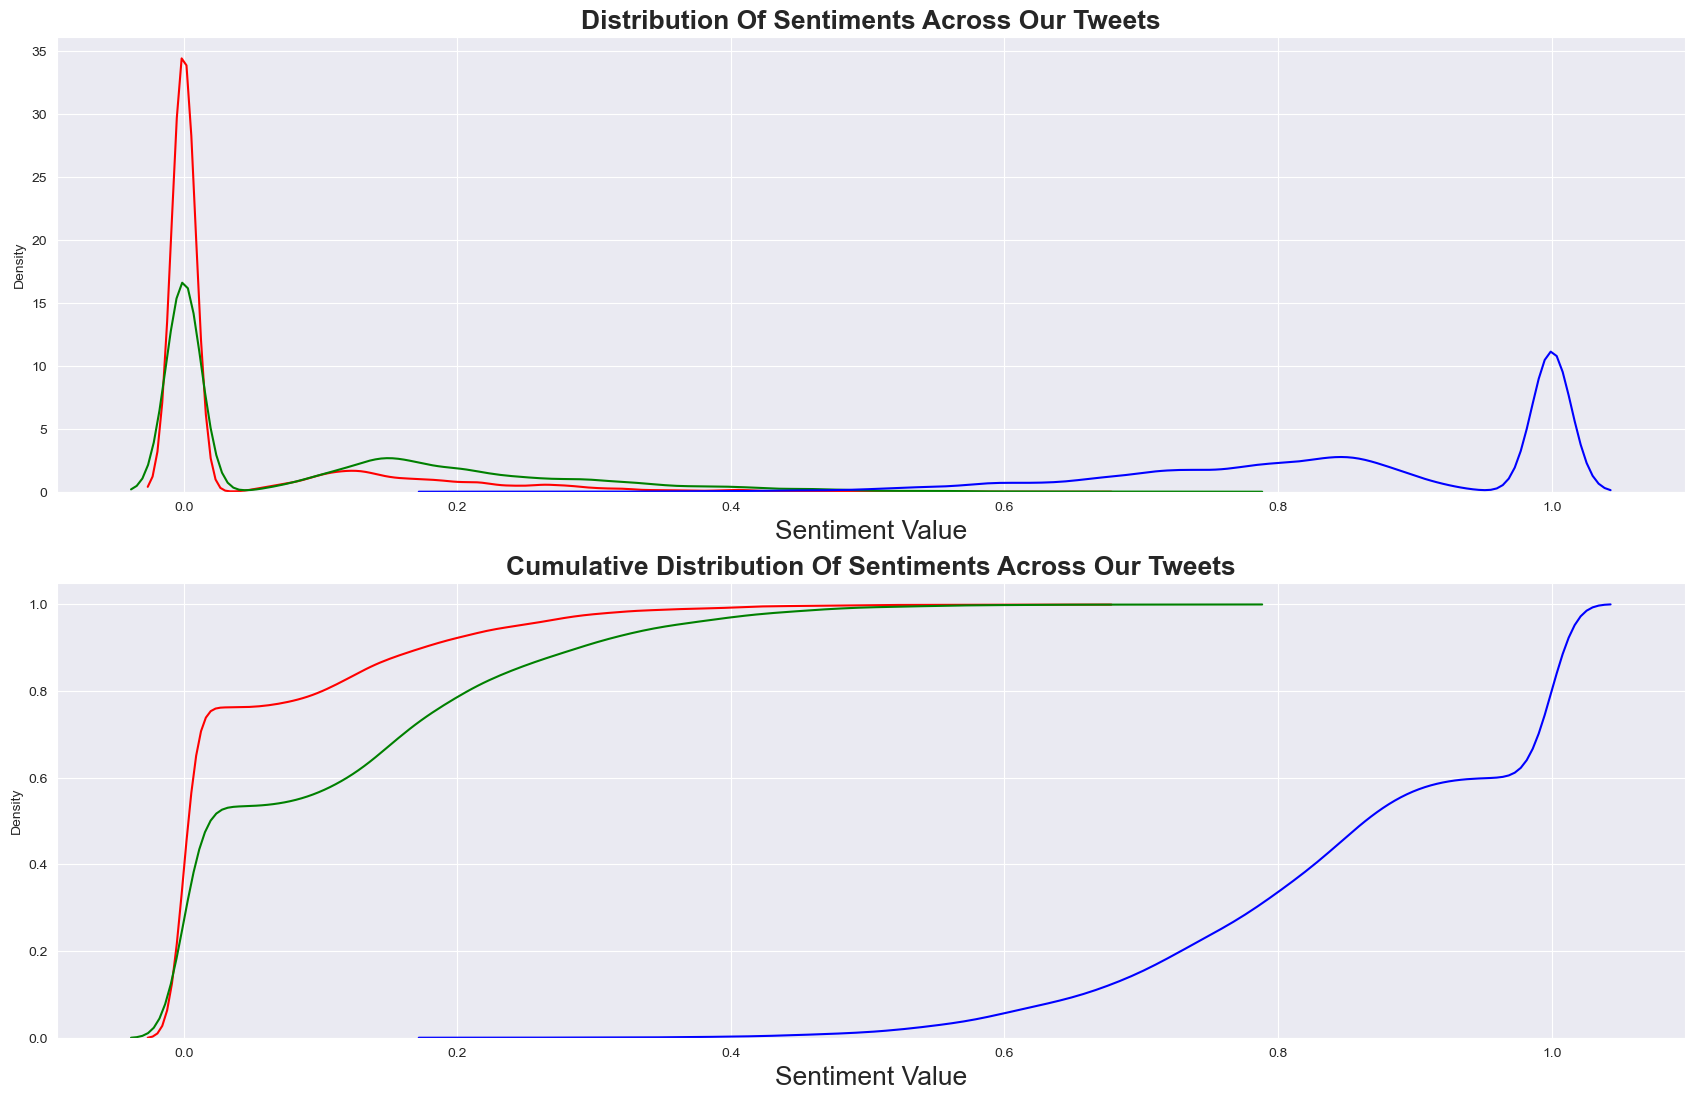

In [115]:
plt.subplot(2,1,1)
plt.title('Distribution Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(df_new['neg'],bw=0.1, label='Negative', color='red')
sns.kdeplot(df_new['pos'],bw=0.1, label='Positive', color='green')
sns.kdeplot(df_new['neu'],bw=0.1, label='Neutral', color='blue')
plt.xlabel('Sentiment Value',fontsize=19)

plt.subplot(2,1,2)
plt.title('Cumulative Distribution Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(df_new['neg'],bw=0.1, cumulative=True, label='Negative', color='red')
sns.kdeplot(df_new['pos'],bw=0.1, cumulative=True, label='Positive', color='green')
sns.kdeplot(df_new['neu'],bw=0.1, cumulative=True, label='Neutral', color='blue')
plt.xlabel('Sentiment Value',fontsize=19);

In [116]:
df_new["sentiment"] = df_new["compound"].apply(lambda x: "positive" if x >= 0.05 else("negative" if x <= -0.05 else "neutral"))

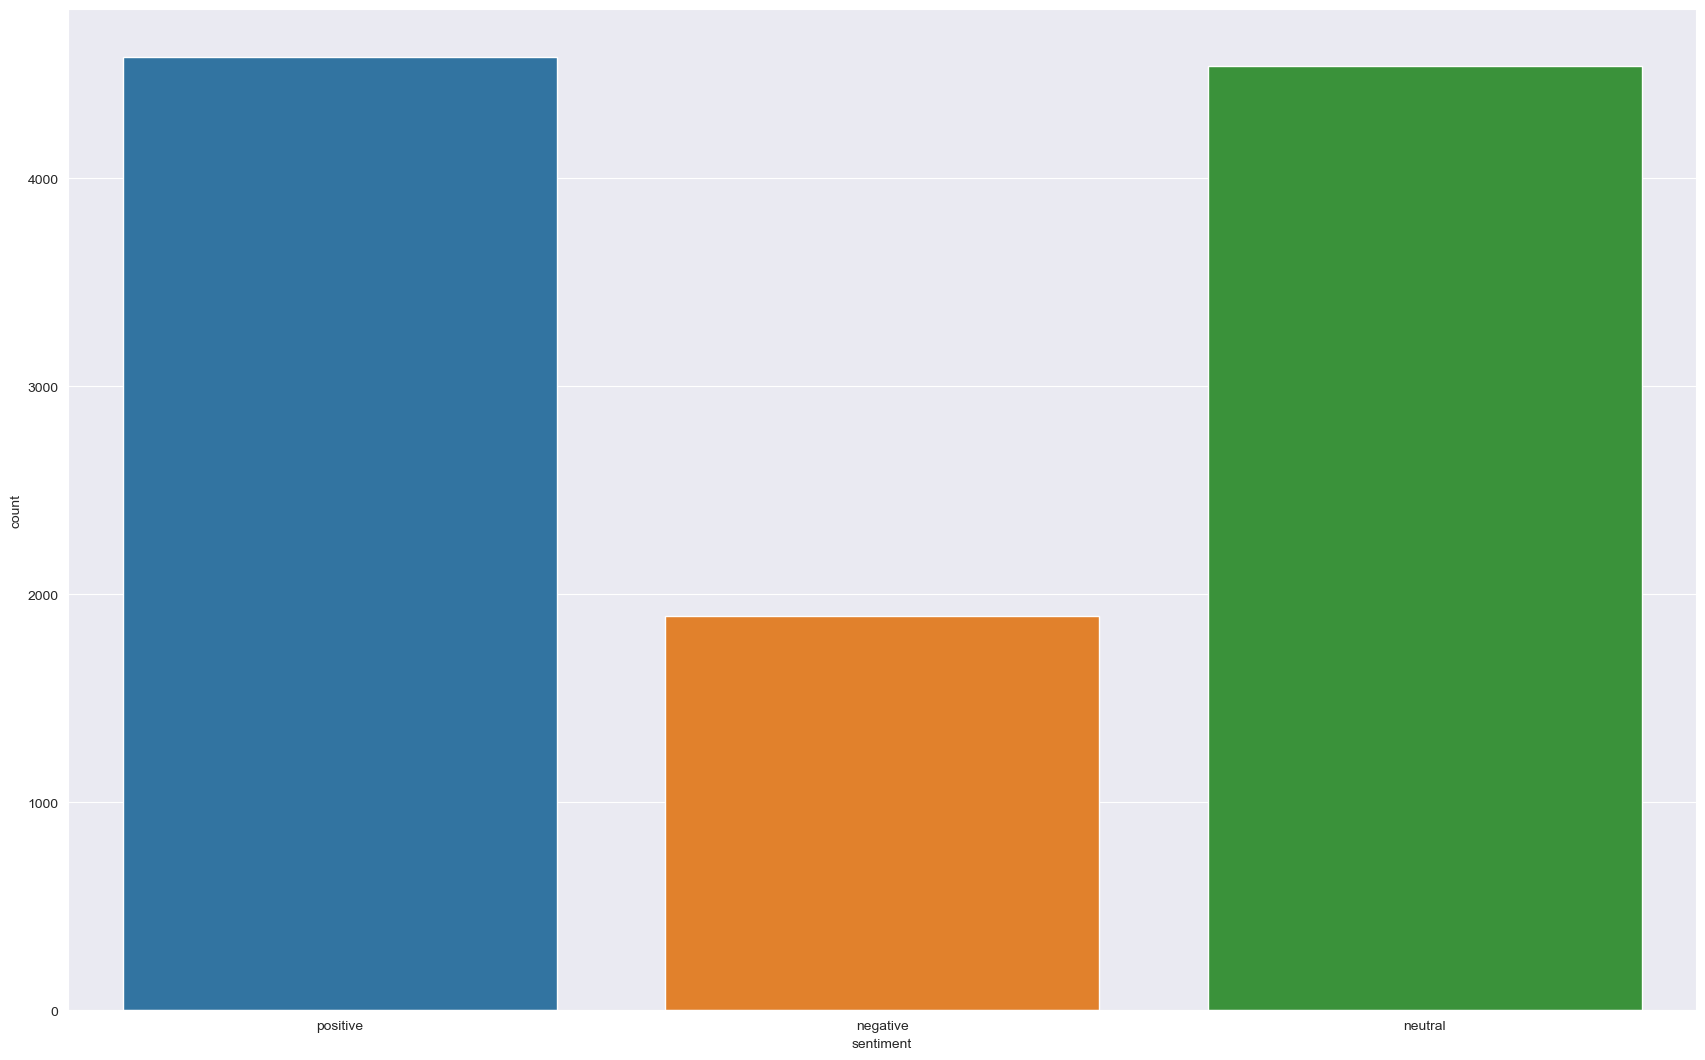

In [117]:
sns.countplot(x=df_new["sentiment"]);

In [118]:
df_new.sample()

text    pos  neg    neu  \
806  this morning i ve given my first covid vaccine...  0.274  0.0  0.726   

     compound sentiment  
806    0.7783  positive

In [119]:
df["sentiment"] = df_new["sentiment"]
df.drop("sentiment_scores", axis=1, inplace=True)
df.sample()

id    user_name user_location  \
8735  1407362132350365696  木根渕猛［きねちゃん］           新潟市   

                                       user_description         user_created  \
8735  FACS specialist. SRL→持田製薬→順大医免疫技官→東京免疫薬理研主任研究員...  2011-03-19 04:17:27   

      user_followers  user_friends  user_favourites  user_verified  \
8735             517           856             6219          False   

                     date  ...         hashtags              source retweets  \
8735  2021-06-22 15:37:34  ...  ['mRNAvaccine']  Twitter for iPhone        0   

      favorites  is_retweet            datetime  year  month  day  sentiment  
8735          2       False 2021-06-22 15:37:34  2021      6   22   positive  

[1 rows x 21 columns]

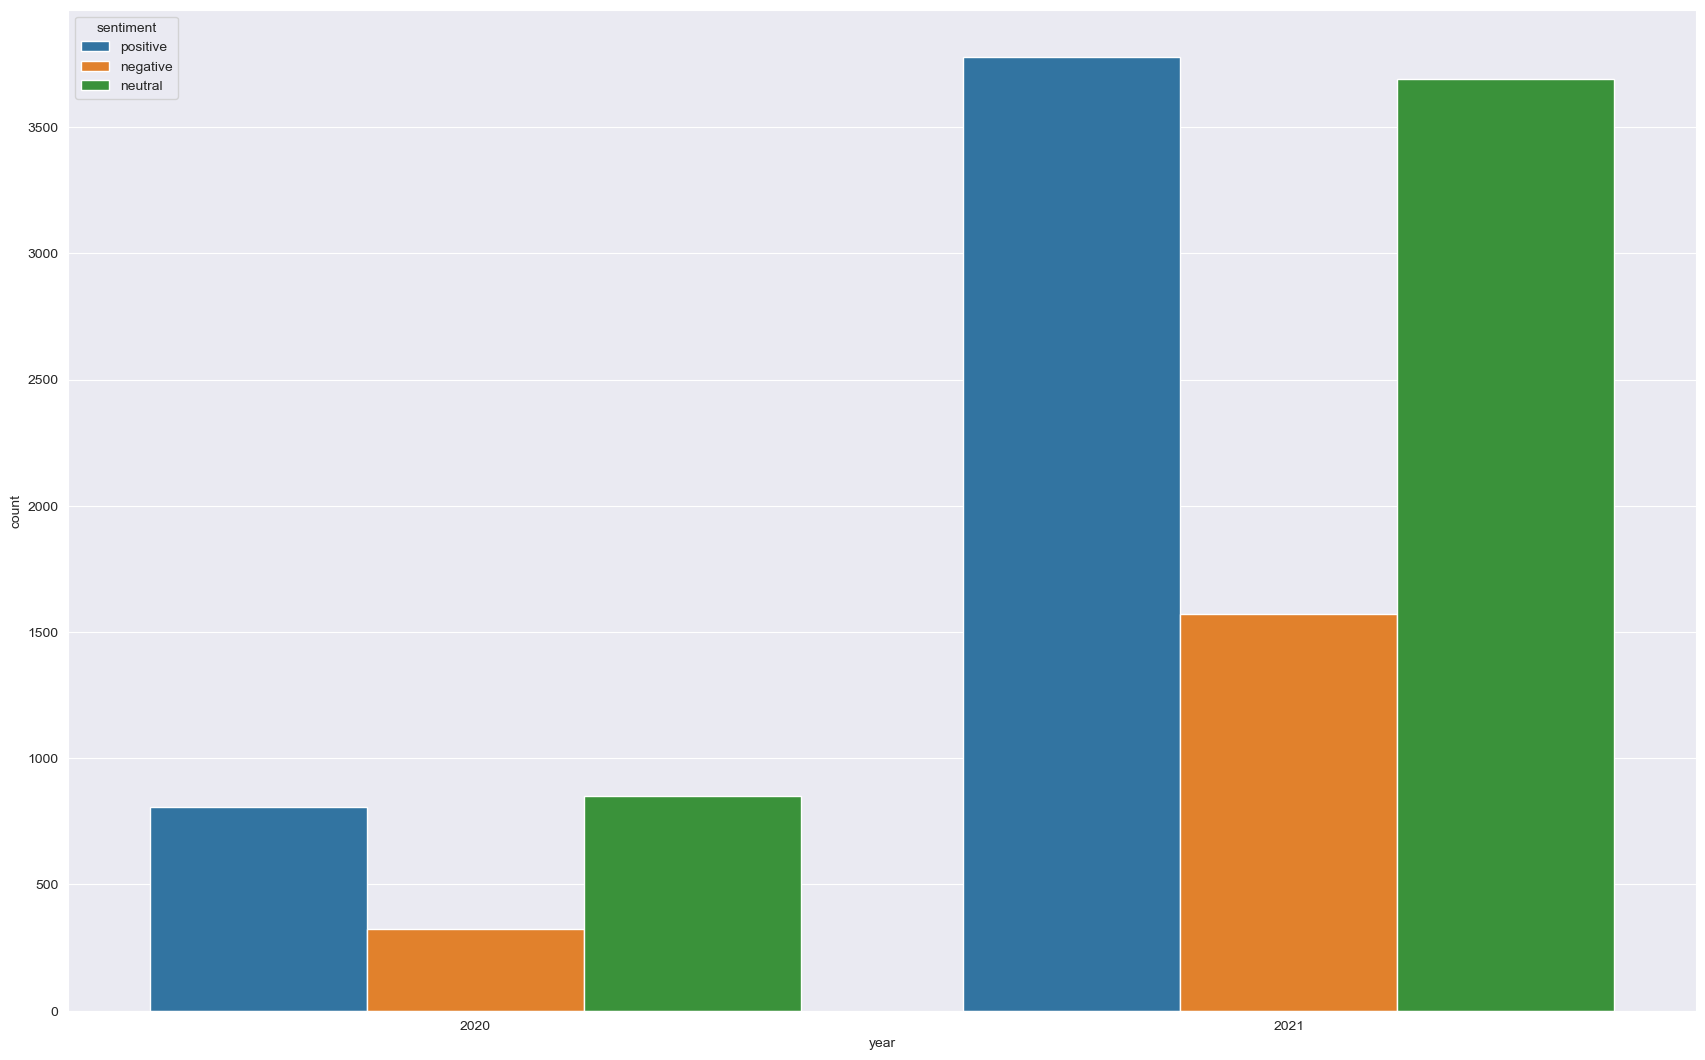

In [120]:
# Plotting the count of tweet sentiments per year
sns.countplot(x=df["year"], hue=df["sentiment"]);

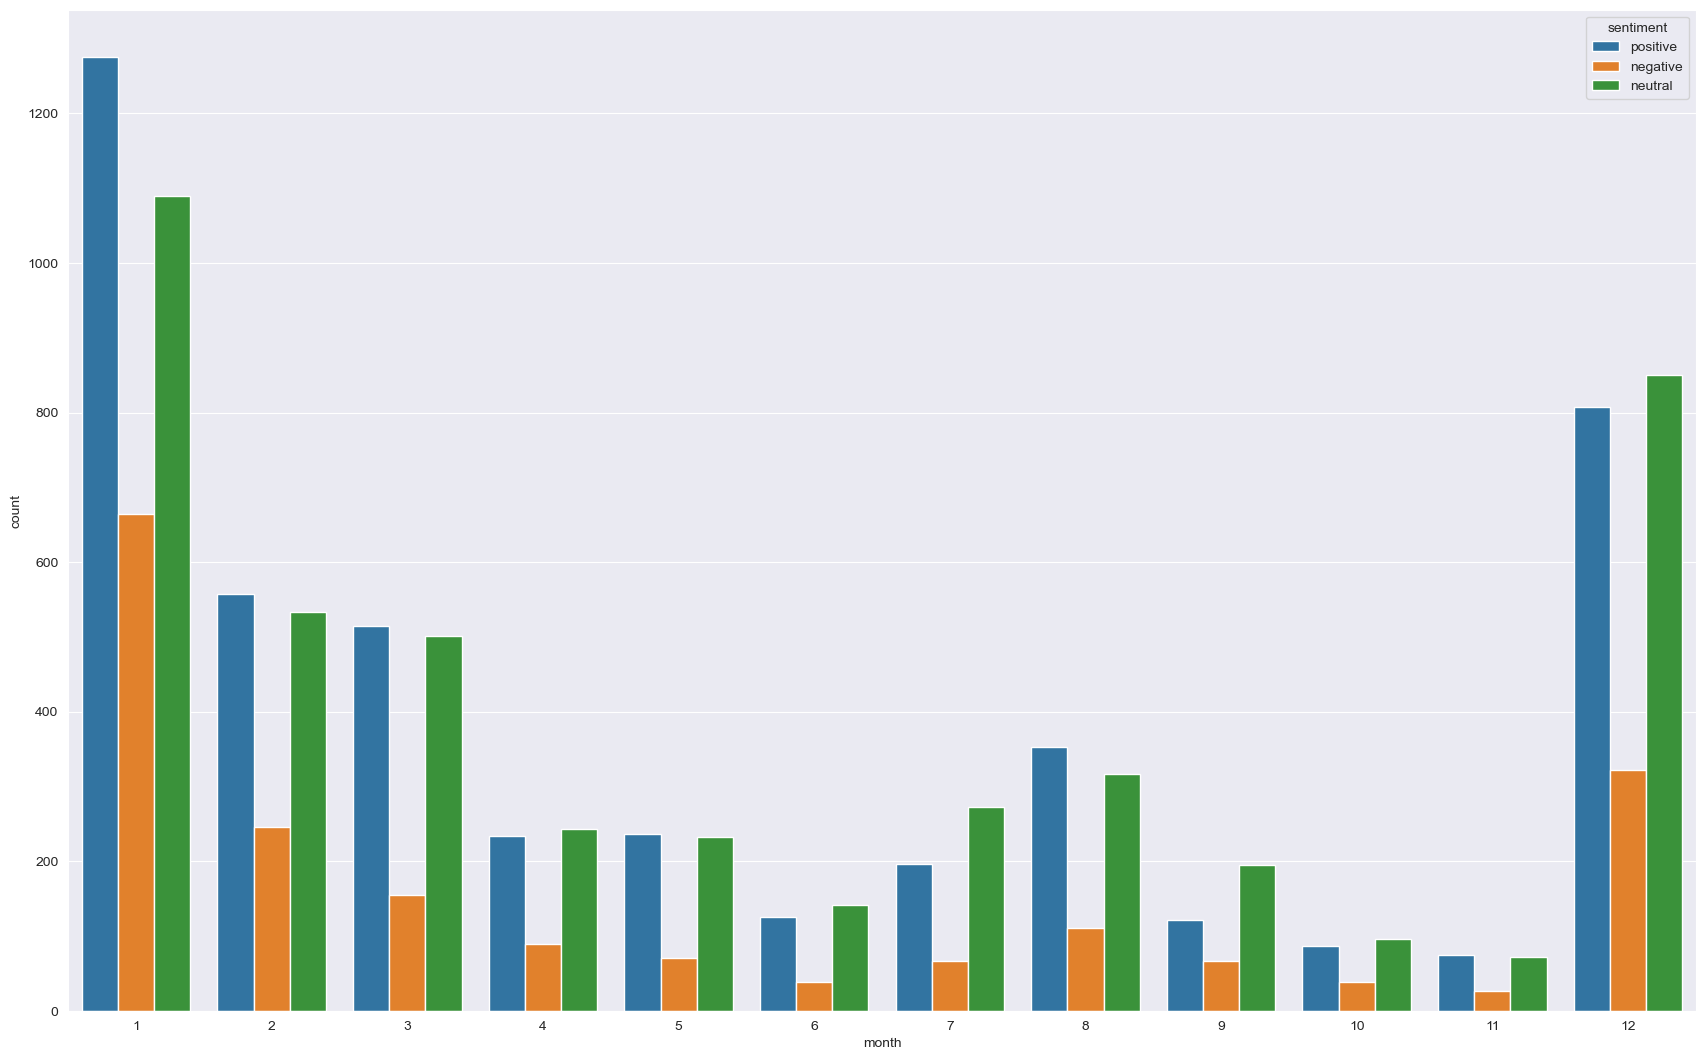

In [121]:
# Plotting the count of tweet sentiments per month
sns.countplot(x=df["month"], hue=df["sentiment"]);

## wordcloud

In [122]:
def wc(data, bgcolor):
    plt.figure(figsize=(10,10))
    mask = np.array(Image.open("covid-19.png"))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask = mask)

    data_str = data.fillna('').astype(str)

    wc.generate("".join(data_str))
    plt.imshow(wc)
    plt.axis("off")


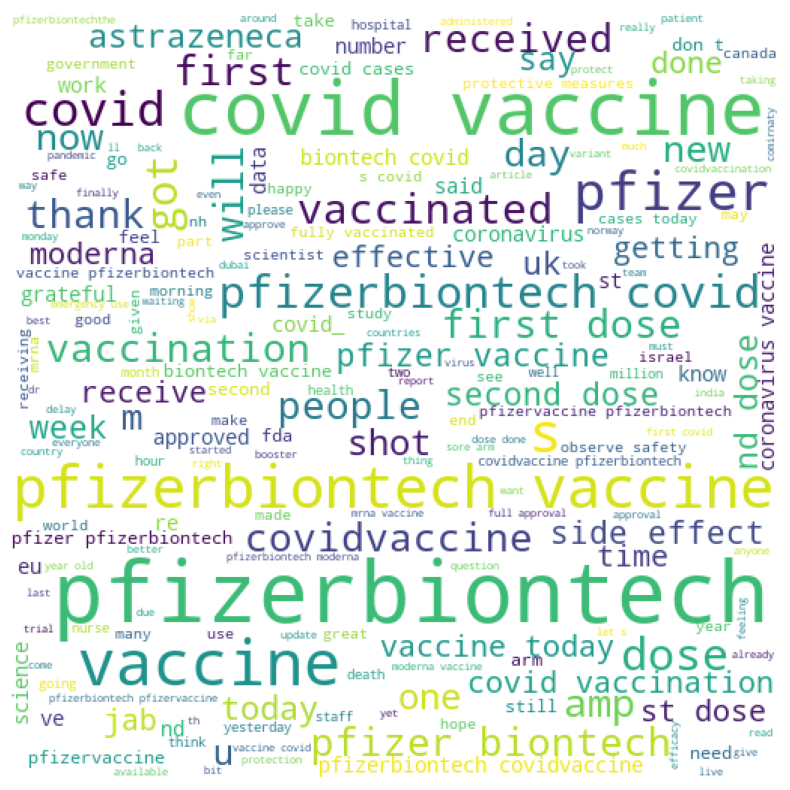

In [125]:
# all words
wc(df["text"], "white")


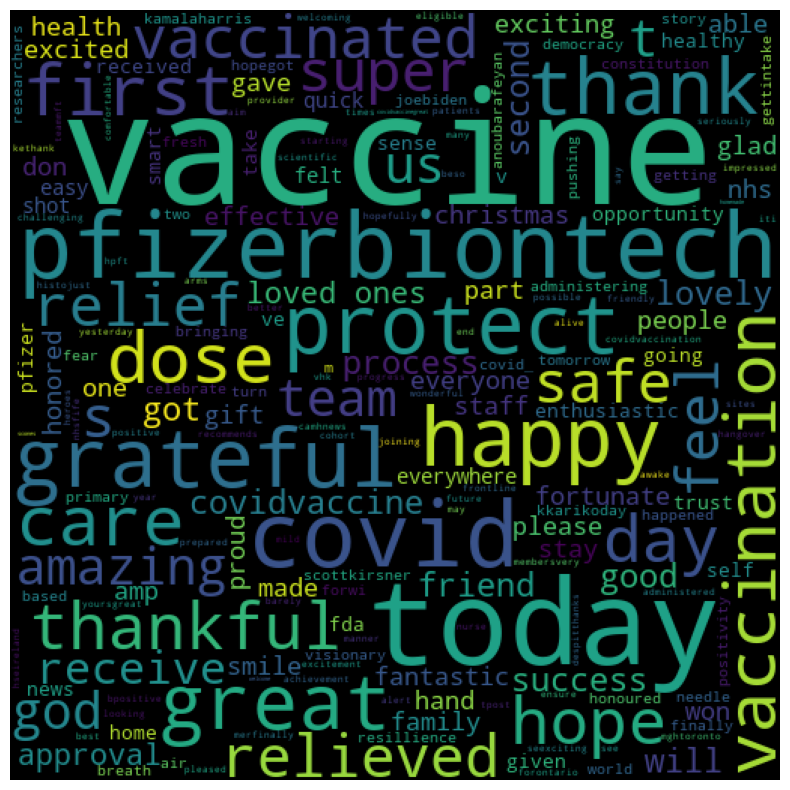

In [134]:
# most positive words
most_pos = df_new[df_new["compound"] >= 0.9]["text"]
wc(most_pos, "black")

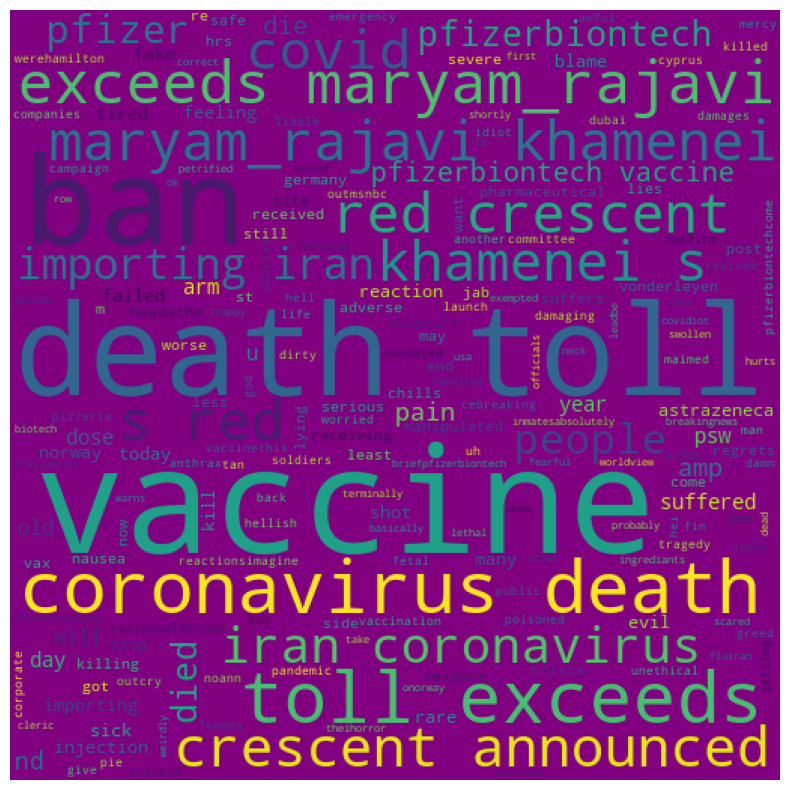

In [136]:
# most negative words
most_neg = df_new[df_new["compound"] <= -0.8]["text"]
wc(most_neg, "purple")

## Top 10 Most Positive Sentiments

In [169]:

most_positive = df_new[df_new["compound"] >= 0.5]["text"]

# Function to calculate sentiment for each word
def get_word_sentiments(text):
    words = word_tokenize(text)
    word_sentiments = {}
    for word in words:
        if word.isalpha():  # Consider only alphabetic tokens
            sentiment = sid.polarity_scores(word)['compound']
            word_sentiments[word] = sentiment
    return word_sentiments

# Apply the function to the DataFrame
word_sentiments_dict = defaultdict(list)
for text in most_positive:
    word_sentiments = get_word_sentiments(text)
    for word, sentiment in word_sentiments.items():
        word_sentiments_dict[word].append(sentiment)

# Calculate average sentiment for each word
average_word_sentiments = {word: sum(sentiments) / len(sentiments) for word, sentiments in word_sentiments_dict.items()}

# Convert the dictionary to a DataFrame
word_sentiments_df = pd.DataFrame(list(average_word_sentiments.items()), columns=['word', 'sentiment'])
most_positive_word = word_sentiments_df.sort_values(by='sentiment', ascending=False).head(10)
most_positive_word

word  sentiment
2163   euphoria     0.6486
2866  perfectly     0.6369
3464     elated     0.6369
746    euphoric     0.6369
45         best     0.6369
630    greatest     0.6369
1101   happiest     0.6369
2871    freedom     0.6369
323        love     0.6369
1973    awesome     0.6249

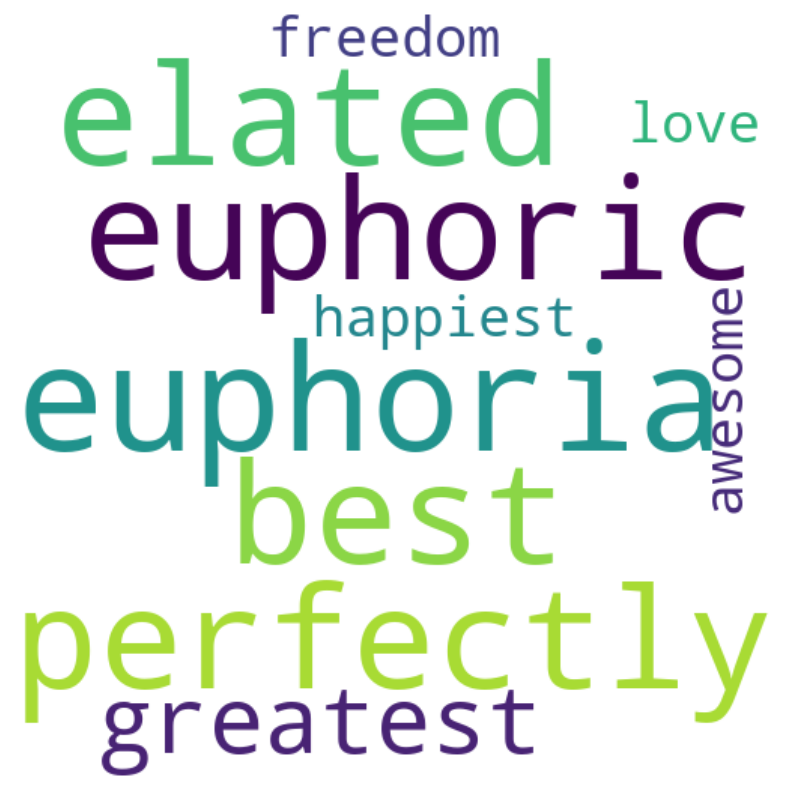

In [171]:
def wc(data, bgcolor):
    plt.figure(figsize=(10, 10))
    mask = np.array(Image.open("covid-19.png"))  # Ensure this image file is available
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=mask)

    data_str = data.fillna('').astype(str)

    wc.generate(" ".join(data_str))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

wc(most_positive_word['word'], 'white')

## Top 10 Most Negative Sentiments

In [174]:

most_negative = df_new[df_new["compound"] <= -0.5]["text"]

# Function to calculate sentiment for each word
def get_word_sentiments(text):
    words = word_tokenize(text)
    word_sentiments = {}
    for word in words:
        if word.isalpha():  # Consider only alphabetic tokens
            sentiment = sid.polarity_scores(word)['compound']
            word_sentiments[word] = sentiment
    return word_sentiments

# Apply the function to the DataFrame
word_sentiments_dict = defaultdict(list)
for text in most_negative:
    word_sentiments = get_word_sentiments(text)
    for word, sentiment in word_sentiments.items():
        word_sentiments_dict[word].append(sentiment)

# Calculate average sentiment for each word
average_word_sentiments = {word: sum(sentiments) / len(sentiments) for word, sentiments in word_sentiments_dict.items()}

# Convert the dictionary to a DataFrame
word_sentiments_df = pd.DataFrame(list(average_word_sentiments.items()), columns=['word', 'sentiment'])
most_negative_word = word_sentiments_df.sort_values(by='sentiment', ascending=True).head(10)
most_negative_word

word  sentiment
369        kill    -0.6908
1755  terrorism    -0.6808
97         hell    -0.6808
70       killed    -0.6705
840    fatality    -0.6705
795     suicide    -0.6705
0       tragedy    -0.6597
339      cancer    -0.6597
1186      devil    -0.6597
638     killing    -0.6597

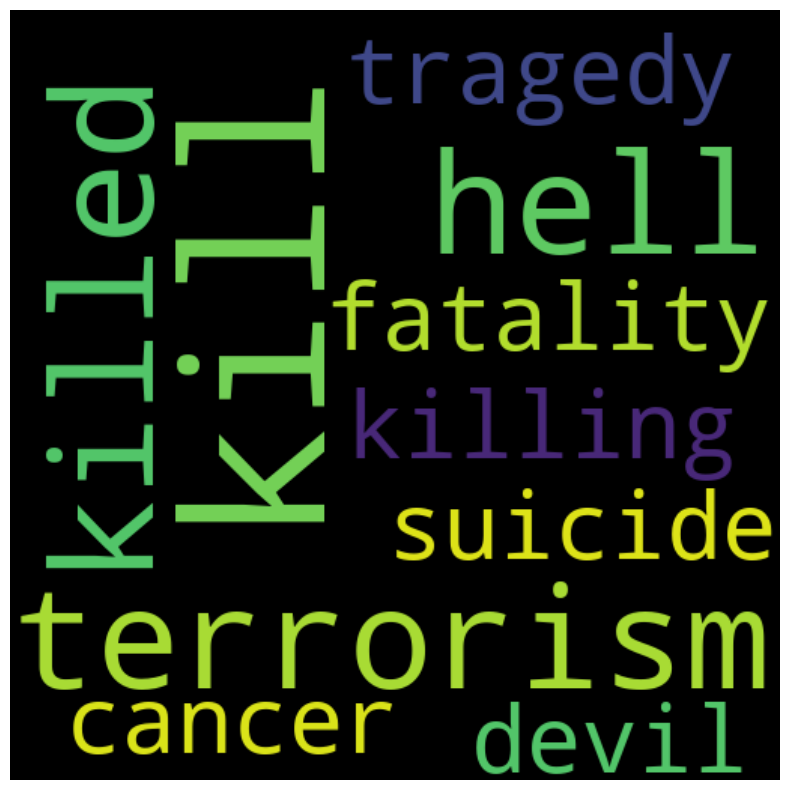

In [175]:
wc(most_negative_word['word'], 'black')

## Conclusion